TITLE: PURCHASE DECISION PREDICTION  

Introduction
In this project, we want to look into the purchase decisions of online consumers on the e-commerce platform by analyzing the Online Shoppers Purchasing Intention Dataset Data Set. The dataset includes 10 numerical and 8 categorical variables regarding one’s visit with Purchase being the class variable. 

Our intention is to examine the correlations between time spent on different types of pages would affect the buying decision. Specifically, we are set to answer: (1) what type of pages purchasers would read most and spend most time on; (2) whether the number of visits or the amount of time spent on administrative, Informational, or Product related pages increases the likelihood of purchasing.

It is a reliable dataset with no N/As and 12,330 observations. As mentioned, the dataset includes 18 variables, many of which are irrelevant to our purpose, and hence would be ruled out. 

Methods

Overview 
We will create a scatter plot showing the number of pages visited and the time spent and colored the dots by their class. We expected there would be a positive correlation between the number of pages viewed and time spent but we would focus on the benchmarks at which customers started to convert to purchasers. Additionally, we would examine the purchasers to see which type of pages they spend the most time reading by aggregating the times and displayed in a bar graph.

In depth Analysis
We will use “Informational_Duration”, “Administrative_Duration” and “ProductRelated_Duration” as our predicting variables and “Revenue” as our class variable. 
We start by loading all relevant packages into our notebook. We then load the data frame into our notebook and tidy up the data by selecting the four required columns: Administrative_Duration, Informational_Duration, ProductRelated_Duration, Revenue. We then divide the data into training(75%) and testing set(25%).
Then, we plot three scatterplots with coloured plots for Revenue (True or False) : 1)Administrative_Duratio and Informational_Duration 
2)Administrative_Duration and ProductRelated_Duration
3)Informational_Duration and ProductRelated_Duration

We then preprocess our data by using the recipe function, using revenue as our outcome variable and Administrative_Duration, Informational_Duration and ProductRelated_Duration as our predictor variables. We center and scale all predictor variables.

We then create a classification model using nearest_neighbor function and add it to a workflow with the recipe to finally fit it to our training data. 

Then we use the workflow to predict on our test data and collect metrics that shows us the accuracy. Furthermore, we use vfold_cv function to create cross validations. We create the recipe that shows revenue as the outcome variable and Administrative_Duration, Informational_Duration, ProductRelated_Duration as predictor variables. We center and scale all the predictor variables using the step_center and step_scale function.

We create a model with the nearest neighbor function where the neighbors argument uses the tune() value. While putting the recipe and model in a workflow we use tune_grid() instead of fit or fit_resamples. For the resamples argument we use the shopper_vfold data with a grid argument value of 50. We include collect_metrics() in our code to collect accuracy estimates. We filter for the accuracy estimates from knn_results and use accuracy on the y axis with the number of k on the x axis to find our optimal value of k for the k nearest neighbors analysis.

Expected outcomes and significance

We believe that there will be positive correlations between the number of pages visited and the time for each type of pages as well as positive correlations between different types. One prediction that we want to test is that we believe customers that spend the most time on Product-related pages would become purchasers. 

The result of this project is to allow businesses and marketers to effectively allocate their resources on the type of pages that would increase conversion rate, the chance that one customer becomes a purchaser. 

The findings of the project may lead to future behavioral studies on what impacts online consumers and what makes online consumers spend more time on websites. 


In [1]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(tidymodels)
options(repr.matrix.max.rows = 6)





── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘cowplot’ was built under R version 4.0.3”
Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ rsample   0.0.7 
✔ dials    

In [2]:
shoppers_data<-read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv") %>% mutate(Revenue = as.factor(Revenue))
shoppers_data

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<fct>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0.0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,6,184.25,0.08333333,0.08666667,0,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.00,0.00000000,0.02105263,0,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.25,0.00000000,0.06666667,0,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [3]:
shoppers <- shoppers_data %>% select(Administrative_Duration,Informational_Duration,ProductRelated_Duration,Revenue)
shoppers


Administrative_Duration,Informational_Duration,ProductRelated_Duration,Revenue
<dbl>,<dbl>,<dbl>,<fct>
0,0,0,FALSE
0,0,64,FALSE
0,0,0,FALSE
⋮,⋮,⋮,⋮
0,0,184.25,FALSE
75,0,346.00,FALSE
0,0,21.25,FALSE


In [4]:
set.seed(101) # Set Seed so that same sample can be reproduced in future also
# Now Selecting 75% of data as sample from total 'n' rows of the data  
shoppers_split <- initial_split(shoppers, prop = 0.75, strata = Revenue)  
shoppers_train <- training(shoppers_split)   
shoppers_test <- testing(shoppers_split)
shoppers_train
shoppers_test

Administrative_Duration,Informational_Duration,ProductRelated_Duration,Revenue
<dbl>,<dbl>,<dbl>,<fct>
0,0,0,FALSE
0,0,64,FALSE
0,0,0,FALSE
⋮,⋮,⋮,⋮
0,0,184.25,FALSE
75,0,346.00,FALSE
0,0,21.25,FALSE


Administrative_Duration,Informational_Duration,ProductRelated_Duration,Revenue
<dbl>,<dbl>,<dbl>,<fct>
0,0,98.0000,FALSE
0,0,0.0000,FALSE
0,0,334.9667,FALSE
⋮,⋮,⋮,⋮
150.3571,9,11431.0,TRUE
0.0000,0,212.5,FALSE
0.0000,0,0.0,FALSE


In [5]:
shoppers_adminxinfor_plot <- ggplot(shoppers_train,aes(x= Administrative_Duration,
                                           y=Informational_Duration,
                                          colour = Revenue)) +
                        geom_point() +
                        labs(x= "Administrative Duration", 
                             y= "Informational Duration", colour= "Make a purchase?")
shoppers_adminxproduc_plot <- ggplot(shoppers_train,aes(x= Administrative_Duration,
                                           y=ProductRelated_Duration,
                                          colour = Revenue)) +
                        geom_point() +
                        labs(x= "Administrative Duration", 
                             y= "ProductRelated Duration", colour= "Make a purchase?")
shoppers_inforxproduc_plot <- ggplot(shoppers_train,aes(x= Informational_Duration,
                                           y=ProductRelated_Duration,
                                          colour = Revenue)) +
                        geom_point() +
                        labs(x= "Informational Duration", 
                             y= "ProductRelated Duration", colour= "Make a purchase?")




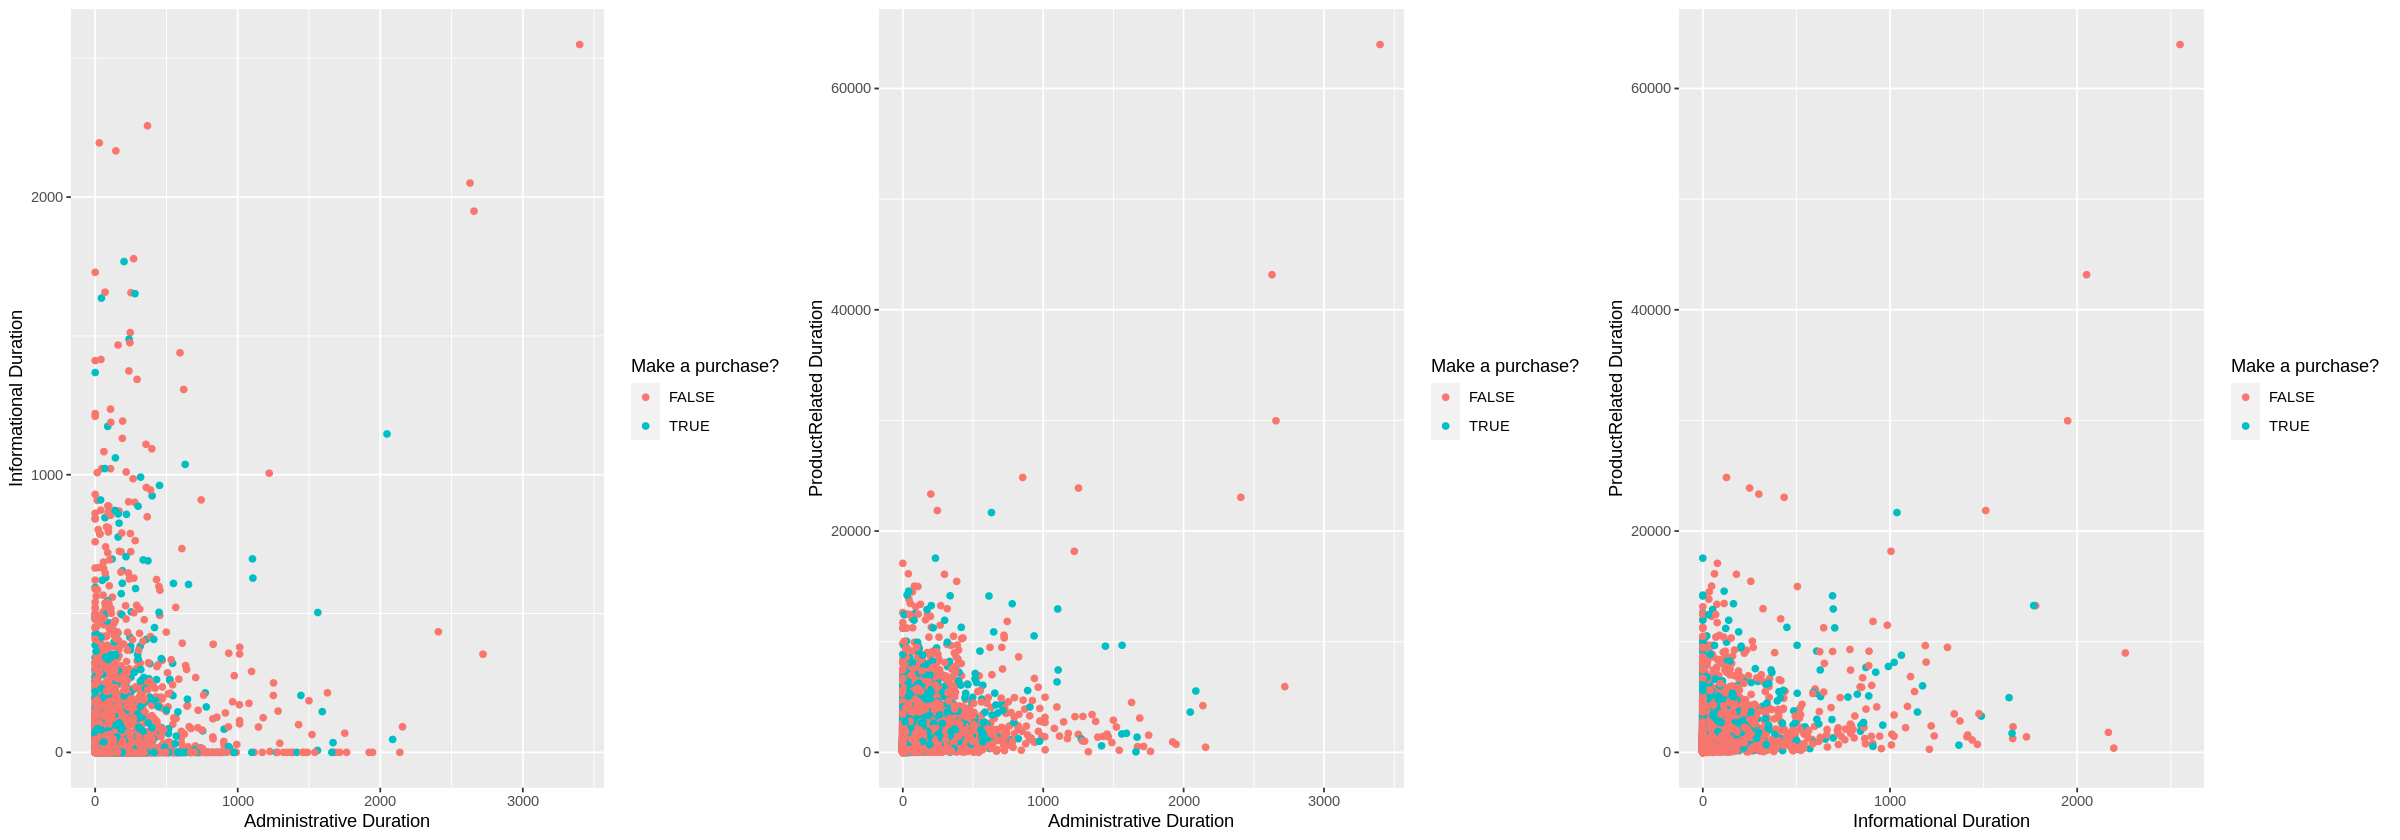

In [6]:
options(repr.plot.width = 20, repr.plot.height = 7)
plot_grid(shoppers_adminxinfor_plot,
          shoppers_adminxproduc_plot,
          shoppers_inforxproduc_plot,
          ncol = 3)

In [7]:
shoppers_recipe <- recipe(Revenue ~ Administrative_Duration+Informational_Duration+ ProductRelated_Duration, data = shoppers_train)%>%
step_scale(all_predictors()) %>%
step_center(all_predictors())
shoppers_recipe

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [8]:
set.seed(101)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_fit <- workflow() %>%
  add_recipe(shoppers_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = shoppers_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.198205
Best kernel: rectangular
Best k: 3

In [9]:
shoppers_test_predictions <- predict(knn_fit, shoppers_test) %>%
  bind_cols(shoppers_test)
shoppers_test_predictions

.pred_class,Administrative_Duration,Informational_Duration,ProductRelated_Duration,Revenue
<fct>,<dbl>,<dbl>,<dbl>,<fct>
FALSE,0,0,98.0000,FALSE
FALSE,0,0,0.0000,FALSE
TRUE,0,0,334.9667,FALSE
⋮,⋮,⋮,⋮,⋮
FALSE,150.3571,9,11431.0,TRUE
FALSE,0.0000,0,212.5,FALSE
FALSE,0.0000,0,0.0,FALSE


In [10]:
shoppers_test_predictions %>%
  metrics(truth = Revenue, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8085659
kap,binary,0.0750573


In [11]:
shoppers_test_predictions %>%
  conf_mat(truth = Revenue, estimate = .pred_class)

          Truth
Prediction FALSE TRUE
     FALSE  2432  417
     TRUE    173   60

In [12]:
shopper_vfold<-vfold_cv(shoppers_train, v=5, strata=Revenue)

In [13]:
shoppers_recipe <- recipe(Revenue ~ Administrative_Duration+Informational_Duration+ ProductRelated_Duration, data = shoppers_train)%>%
step_scale(all_predictors()) %>%
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors=tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

knn_results <- workflow()%>%add_recipe(shoppers_recipe) %>%add_model(knn_spec) %>%tune_grid(resamples = shopper_vfold,grid=50)%>%collect_metrics
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7496768,5,0.004100198,Model01
1,roc_auc,binary,0.5216672,5,0.009665836,Model01
2,accuracy,binary,0.7485959,5,0.004289054,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
14,roc_auc,binary,0.6322556,5,0.001947683,Model14
15,accuracy,binary,0.8422358,5,0.001271496,Model15
15,roc_auc,binary,0.6340292,5,0.002890910,Model15


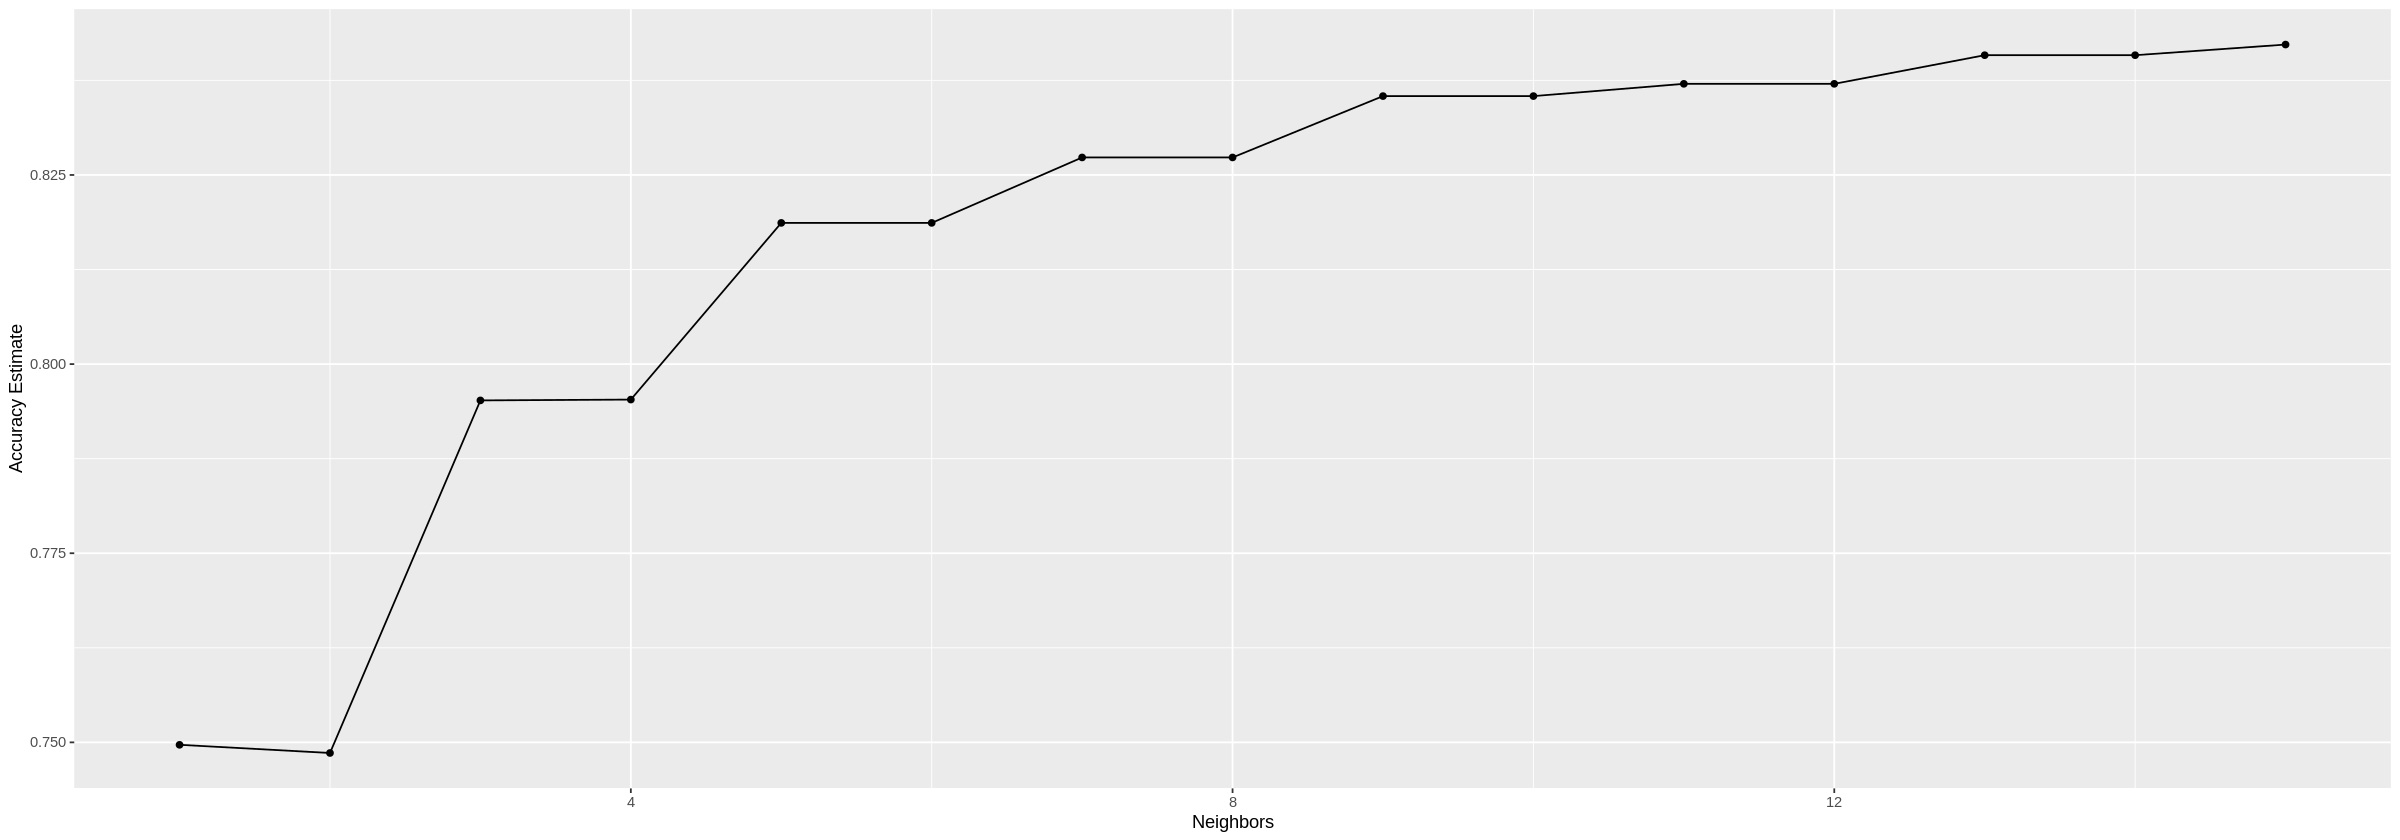

In [14]:
accuracies <- knn_results %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")
accuracy_vs_k